# **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note** If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

In [607]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


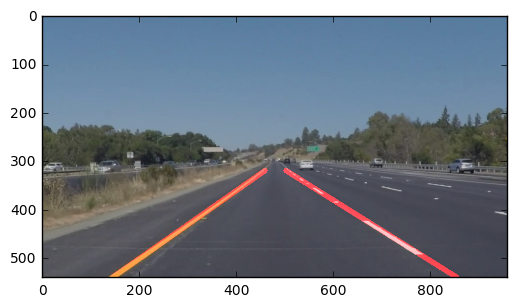

In [608]:
#reading in an image
image = mpimg.imread('test_images/solidYellowLeft.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)

image_copy = np.copy(image)

gray = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

low_threshold = 100
high_threshold = 250
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)


mask = np.zeros_like(edges)
ignore_mask_color = 255

im_shape = image.shape

vertices = np.array([[(0, im_shape[0]), (450, 320), (490, 320), (im_shape[1], im_shape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

rho = 2
theta = np.pi/180
threshold = 55
min_line_length = 100
max_line_gap = 150
line_image = np.copy(image) * 0

lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

im_shape = image.shape

y_max = im_shape[0]
y_min = 320

left_slopes = []
right_slopes = []

right_intercepts = []
left_intercepts = []


for line in lines:
    for x1,y1,x2,y2 in line: 
        slope = (y2 - y1) / (x2 - x1)
        intercept = y1 - (slope * x1)
        
        # Left Lane
        if slope < 0:
            if not np.isnan(slope) or not np.isinf(slope):
                left_slopes.append(slope)
            if not np.isnan(intercept) or not np.isinf(intercept):
                left_intercepts.append(intercept)
        #Right Lane
        elif slope > 0:
            if not np.isnan(slope) or not np.isinf(slope):
                right_slopes.append(slope)
            if not np.isnan(intercept) or not np.isinf(intercept):
                right_intercepts.append(intercept)

left_mean_slope = np.mean(left_slopes)
right_mean_slope = np.mean(right_slopes)

left_mean_intercept = np.mean(left_intercepts)
right_mean_intercept = np.mean(right_intercepts)

# get x from the average slope and intercepts x = (y-b)/m
if not np.isnan(left_mean_slope) and not np.isinf(left_mean_slope):
    x_max_left = int((y_max - left_mean_intercept) / left_mean_slope)
    x_min_left = int((y_min - left_mean_intercept) / left_mean_slope)
    cv2.line(line_image, (x_min_left, y_min), (x_max_left, y_max), (255, 0, 0), 10)
    
if not np.isnan(right_mean_slope) and not np.isinf(right_mean_slope):
    x_max_right = int((y_max - right_mean_intercept) / right_mean_slope)
    x_min_right = int((y_min - right_mean_intercept) / right_mean_slope)
    cv2.line(line_image, (x_min_right, y_min), (x_max_right, y_max), (255, 0, 0), 10)
        
color_edges = np.dstack((edges, edges, edges))
line_edges = cv2.addWeighted(image, 0.8, line_image, 1, 0)
plt.imshow(line_edges)

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [640]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """

    im_shape = img.shape
    y_max = im_shape[0]
    y_min = 320

    left_slopes = []
    right_slopes = []

    right_intercepts = []
    left_intercepts = []


    for line in lines:
        for x1,y1,x2,y2 in line: 
            slope = (y2 - y1) / (x2 - x1)
            intercept = y1 - (slope * x1)
            # Left Lane
            if slope < 0:
                if not np.isnan(slope) or not np.isinf(slope):
                    left_slopes.append(slope)
                if not np.isnan(intercept) or not np.isinf(intercept):
                    left_intercepts.append(intercept)
            #Right Lane
            elif slope > 0:
                if not np.isnan(slope) or not np.isinf(slope):
                    right_slopes.append(slope)
                if not np.isnan(intercept) or not np.isinf(intercept):
                    right_intercepts.append(intercept)

    left_mean_slope = np.mean(left_slopes)
    right_mean_slope = np.mean(right_slopes)
    
    left_mean_intercept = np.mean(left_intercepts)
    right_mean_intercept = np.mean(right_intercepts)

    # get x from the average slope and intercepts x = (y-b)/m
    if not np.isnan(left_mean_slope) and not np.isinf(left_mean_slope):
        x_max_left = int((y_max - left_mean_intercept) / left_mean_slope)
        x_min_left = int((y_min - left_mean_intercept) / left_mean_slope)
        cv2.line(img, (x_min_left, y_min), (x_max_left, y_max), (255, 0, 0), 10)
    
    if not np.isnan(right_mean_slope) and not np.isinf(right_mean_slope):
        x_max_right = int((y_max - right_mean_intercept) / right_mean_slope)
        x_min_right = int((y_min - right_mean_intercept) / right_mean_slope)
        cv2.line(img, (x_min_right, y_min), (x_max_right, y_max), (255, 0, 0), 10)


def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((*img.shape, 3), dtype=np.uint8)
    draw_lines(line_img, lines, [255, 0, 0], 4)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

## Test on Images

Now you should build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [913]:
import os
images = os.listdir("test_images/")
for image in images:
    if image.endswith('jpg'):
        print(image)
        untouched_image = mpimg.imread('test_images/' + image)
        image_real = (mpimg.imread('test_images/' + image)*255).astype('uint8')
        gray_image = grayscale(image_real)
        blur_gray = gaussian_blur(image_real, 5)
        edges = canny(blur_gray, 50, 150)
        blur_gray_with_edges = gaussian_blur(edges, 5)
        imshape = image_real.shape
        vertices = np.array([[(0,imshape[0]),(450, 320), (490, 320), (imshape[1],imshape[0])]], dtype=np.int32)
        masked_edges = region_of_interest(blur_gray_with_edges, vertices)
        line_image = np.copy(image_copy) * 0
        rho = 3
        theta = np.pi/180
        threshold = 150
        min_line_length = 155
        max_line_gap = 100
        hough_image = hough_lines(masked_edges, rho, theta, threshold, min_line_length, max_line_gap)
        show_image = weighted_img(hough_image, untouched_image, 0.8, 1, 0)
        plt.imsave('test_images/' +image + '-marked.png', show_image)     
    

solidWhiteCurve.jpg
solidWhiteRight.jpg
solidYellowCurve.jpg
solidYellowCurve2.jpg
solidYellowLeft.jpg
whiteCarLaneSwitch.jpg


run your solution on all test_images and make copies into the test_images directory).

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

In [914]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [915]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image with lines are drawn on lanes)
    image_copy = np.copy(image)
    image_real = (image_copy*255).astype('uint8')
    gray_image = grayscale(image_real)
    blur_gray = gaussian_blur(image_real, 5)
    edges = canny(blur_gray, 50, 150)
    blur_gray_with_edges = gaussian_blur(edges, 5)
    imshape = image_real.shape
    vertices = np.array([[(0,imshape[0]),(450, 320), (490, 320), (imshape[1],imshape[0])]], dtype=np.int32)
    masked_edges = region_of_interest(blur_gray_with_edges, vertices)
    line_image = np.copy(image_copy) * 0
    rho = 2
    theta = np.pi/180
    threshold = 150
    min_line_length = 155
    max_line_gap = 100
    hough_image = hough_lines(masked_edges, rho, theta, threshold, min_line_length, max_line_gap)
    result = weighted_img(hough_image, image, 0.8, 1, 0)
    return result

Let's try the one with the solid white lane on the right first ...

In [916]:
white_output = 'white.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4








  0%|          | 0/222 [00:00<?, ?it/s]





  2%|▏         | 4/222 [00:00<00:06, 33.42it/s]





  4%|▎         | 8/222 [00:00<00:06, 34.12it/s]





  5%|▌         | 12/222 [00:00<00:06, 33.43it/s]





  7%|▋         | 16/222 [00:00<00:06, 33.67it/s]





  9%|▉         | 20/222 [00:00<00:05, 35.33it/s]





 11%|█         | 24/222 [00:00<00:05, 35.53it/s]





 13%|█▎        | 29/222 [00:00<00:05, 36.73it/s]





 15%|█▌        | 34/222 [00:00<00:04, 37.81it/s]





 17%|█▋        | 38/222 [00:01<00:04, 38.04it/s]





 19%|█▉        | 42/222 [00:01<00:04, 38.56it/s]





 21%|██        | 46/222 [00:01<00:04, 38.85it/s]





 23%|██▎       | 50/222 [00:01<00:04, 38.35it/s]





 24%|██▍       | 54/222 [00:01<00:04, 37.82it/s]





 26%|██▌       | 58/222 [00:01<00:04, 38.08it/s]





 28%|██▊       | 62/222 [00:01<00:04, 36.30it/s]





 30%|███       | 67/222 [00:01<00:04, 37.63it/s]





 32%|███▏      | 71/222 [00:01<00:04, 37.27it/s]





 34%|███▍      | 75/222 [00:02<00

[MoviePy] Done.
[MoviePy] >>>> Video ready: white.mp4 

CPU times: user 6.74 s, sys: 1.9 s, total: 8.64 s
Wall time: 6.16 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [917]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

**At this point, if you were successful you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform.  Modify your draw_lines function accordingly and try re-running your pipeline.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [918]:
yellow_output = 'yellow.mp4'
clip2 = VideoFileClip('solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video yellow.mp4
[MoviePy] Writing video yellow.mp4








  0%|          | 0/682 [00:00<?, ?it/s]





  1%|          | 4/682 [00:00<00:19, 35.40it/s]





  1%|▏         | 9/682 [00:00<00:18, 36.81it/s]





  2%|▏         | 13/682 [00:00<00:17, 37.58it/s]





  2%|▏         | 17/682 [00:00<00:18, 35.75it/s]





  3%|▎         | 21/682 [00:00<00:17, 36.83it/s]





  4%|▎         | 25/682 [00:00<00:17, 37.59it/s]





  4%|▍         | 29/682 [00:00<00:17, 36.34it/s]





  5%|▍         | 33/682 [00:00<00:17, 37.08it/s]





  6%|▌         | 38/682 [00:01<00:16, 37.92it/s]





  6%|▋         | 43/682 [00:01<00:16, 38.11it/s]





  7%|▋         | 47/682 [00:01<00:16, 37.57it/s]





  7%|▋         | 51/682 [00:01<00:16, 37.63it/s]





  8%|▊         | 55/682 [00:01<00:16, 37.05it/s]





  9%|▊         | 59/682 [00:01<00:16, 37.31it/s]





  9%|▉         | 63/682 [00:01<00:16, 36.72it/s]





 10%|▉         | 67/682 [00:01<00:19, 31.10it/s]





 10%|█         | 71/682 [00:01<00:19, 31.04it/s]





 11%|█         | 75/682 [00:02<00

[MoviePy] Done.
[MoviePy] >>>> Video ready: yellow.mp4 

CPU times: user 21.6 s, sys: 5.62 s, total: 27.2 s
Wall time: 20 s


In [919]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Reflections

Congratulations on finding the lane lines!  As the final step in this project, we would like you to share your thoughts on your lane finding pipeline... specifically, how could you imagine making your algorithm better / more robust?  Where will your current algorithm be likely to fail?

Please add your thoughts below,  and if you're up for making your pipeline more robust, be sure to scroll down and check out the optional challenge video below!

I learnt a lot in terms of the process pipeline and steps of how to process images via canny edge detection and hough transform to identify the lines and mark them. The part that I feel I have done incorrectly is the extrapolation of the line. Alot of that have to do with ramping up with brushing up on algebra and translating that into code. Definitely having a lot of line points and understanding how they tie in together as well.

During the algorithm development, I had a couple of bugs and learning steps, let me show you below:




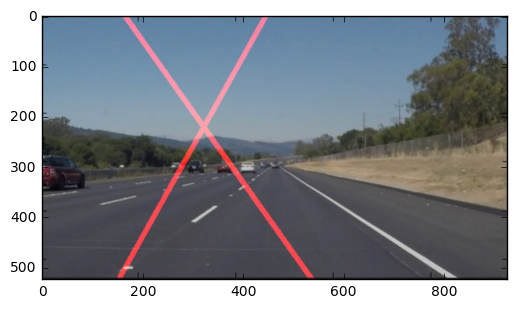

In [453]:
why_image = mpimg.imread('learning_process/wait_but_why.png')
plt.imshow(why_image)

At the begining while working on my algorithm, I got a variety of results like the image above, where I wasn't entirely sure why my lines aren't lining up. Well I was iterating the matrix of numbers to simply say: please give me the smallest point on the left side and the largest point, and the same process for the right side. That didn't workout, as you see the y and x axis what is defined as max and min is not aligned together. Then I started expirementing more focusing on each side.

First I focused on the left lane:


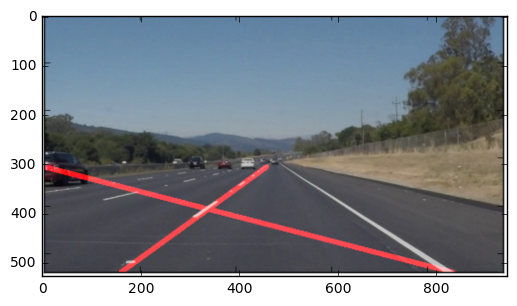

In [391]:
half_way = mpimg.imread('learning_process/half_way_there.png')
plt.imshow(half_way)

I started getting the left lane right, it felt simple, and it felt like I can apply the same learnings to the right lane, right... Well not exactly, look at what happened to right lane next:

Focusing on the right lane:


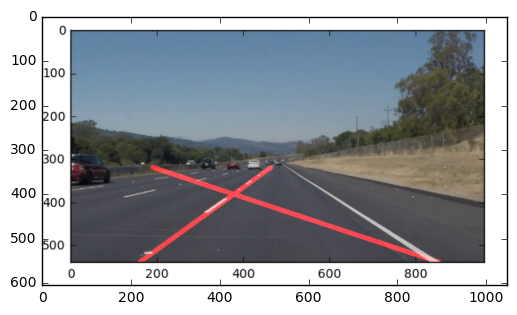

In [392]:
almost = mpimg.imread('learning_process/Almost_there.png')
plt.imshow(almost)

While that image looks a little meta, tweaking with my right lane made the line come a little closer but really not by that much. Until I realized that well, maybe there is possibility that the x-axis could give results that go beyond the mask, and rembered how we used the mask in class to basically define where to look for lanes. So I started thinking of limiting my x-axis value until where the right side of the mask.

While that worked on the right lane:


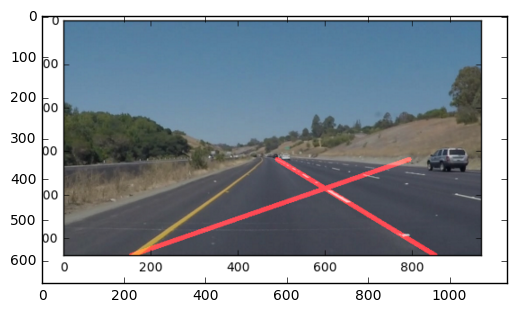

In [393]:
hmm = mpimg.imread('learning_process/hmm_but_why.png')
plt.imshow(hmm)

I decided to follow a similar strategy to the left lane and make sure that the values for the ride side of the mask are being used to limit how far the line is being drawn:


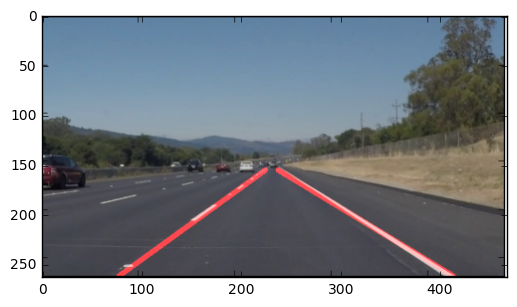

In [394]:
wow = mpimg.imread('learning_process/oh_wow_am_here.png') # not to be mistaken with the awesome world of warcraft
plt.imshow(wow)

while I couldn't contain my excitement for how awesome the result was, while running the algorithm on the different images, that strategy didn't quiet work well.

So What are my next steps?:

After further reading online of the equation of the straight line, my resubmission strategy is to identify the y-intercept and to basically use good old algebra to find out where to draw and extrapolate my lines. I think I should have focused on this strategy early on. I just wasn't sure if I need only two points per lane to draw the line, or I could repeadtly draw the line inside the lines loop.

so using the following function: y=mx+b
and specify y_bottom = 540, and y_top = 320


Revision #1:

I actually was able to get the lines to work properly with my current algorithm without the intercept .. I just had a wrong variable name. I would like to improve on my algorithm though and see how I can use the intercept better.

Revision #2:
After the first review, and thanks to the reviewer the following feedback aided me a lot in changing my algorithm:

"You've already calculated the slopes. So maybe taking the average slope for the right side and average slope for the left side would work. The "b" value can be calculated with a little bit of algebra:
b = y - m*x. You know m because you calculated it. Then you can use either (x1, y1) or (x2, y2) to calculate b.Maybe averaging b values would work. Or feel free to come up with another strategy. But the main criteria for meeting specifications is that the Hough Lines need to actually be used to draw the lane lines."

I finally understood that indeed I can set a max and min y values, and using the average slope and intercept calculate my x values for min and max. Its interesting how it makes so much sense, ofcourse we need to average all points. One problem that still bothers me is how tilted the line to the right is, due to the fact the hough transform produces more points on solid lines than dotted ones. What do you think I can do to smoothen my algorithm more?

The yellow video gave me some errors regarding a NaN value. However I saw on the forum that we might need to tweak our hough or canny detection values. While I had some good luck on the yellow video, I wasn't as successful with the extra challenge. Any guidance here as well is appreicated :) thank you!

Revision #3:

Tried taking a different approach utilizing Gaussian blurring and hough transform to reduce the noise and use bigger 

`max_line_gap`, `min_line_len` and `threshold`. While the lines seemed a lot more dynamic, they seem to get more bumpy and less smooth. Through tweaking the values for the hough transform, I saw a blinking effect that couldn't understand why its happening. Overall I feel I have a general confusion with how the max_line_gap and min_line_len affect how the lines are produced.. and tried adjusting the `rho` value, however that seems to affect the orientation of the line.

While talking to a friend, my friend suggested why not apply some Gaussian blurring after canny detection. I felt the idea was compelling so I printed some images to see how would that look like:


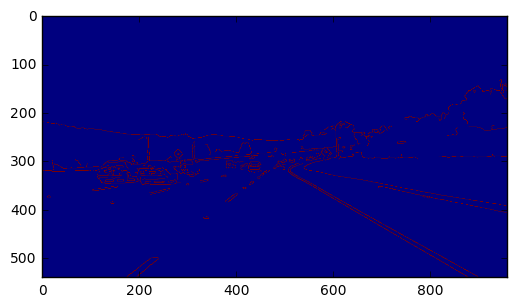

In [921]:
edges = mpimg.imread('learning_process/video_edges.png') # not to be mistaken with the awesome world of warcraft
plt.imshow(edges)

It seems from the image I can fainly see the red lines where the canny detection have found. However after applying some Gaussian blur the picture gets a new meaning and new defintion to its lines:

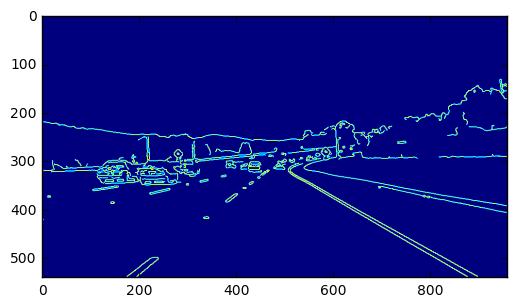

In [922]:
blurr = mpimg.imread('learning_process/second-blur.png') # not to be mistaken with the awesome world of warcraft
plt.imshow(blurr)

The lines appear more defined and crisp, so though that could help reduce the flickering and on and off blinking. However that wasn't the case, while the bumpiness of the lines reduced, the flickering unsteady affect still took place.

Also noticed at threshold `200` I was able to not get that skewed line on the right that goes all the side to the left leaving its right lane behind, however on the other hand it makes the lines more unsteady and the blinking worsens.

Note: I apologize for the inconvinence, I asked on the chat to try and get my problem resolved, however didn't get an answer. Would I trouble you to help me out with the blinking effect and take a look at my code and provide some feedback?

Thank you so so much

## Submission

If you're satisfied with your video outputs it's time to submit!  Submit this ipython notebook for review.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [920]:
challenge_output = 'extra.mp4'
clip2 = VideoFileClip('challenge.mp4')
challenge_clip = clip2.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

[MoviePy] >>>> Building video extra.mp4
[MoviePy] Writing video extra.mp4








  0%|          | 0/251 [00:00<?, ?it/s]





  1%|          | 2/251 [00:00<00:18, 13.15it/s]





  2%|▏         | 4/251 [00:00<00:17, 13.92it/s]





  2%|▏         | 6/251 [00:00<00:17, 14.19it/s]





  3%|▎         | 8/251 [00:00<00:16, 14.85it/s]





  4%|▍         | 10/251 [00:00<00:16, 15.05it/s]





  5%|▍         | 12/251 [00:00<00:16, 14.74it/s]





  6%|▌         | 14/251 [00:00<00:16, 14.10it/s]





  6%|▋         | 16/251 [00:01<00:17, 13.69it/s]





  7%|▋         | 18/251 [00:01<00:16, 13.82it/s]





  8%|▊         | 20/251 [00:01<00:16, 13.95it/s]





  9%|▉         | 22/251 [00:01<00:16, 13.98it/s]





 10%|▉         | 24/251 [00:01<00:16, 13.76it/s]





 10%|█         | 26/251 [00:01<00:17, 12.95it/s]





 11%|█         | 28/251 [00:01<00:16, 13.80it/s]





 12%|█▏        | 30/251 [00:02<00:16, 13.80it/s]





 13%|█▎        | 32/251 [00:02<00:19, 11.12it/s]





 14%|█▎        | 34/251 [00:02<00:22,  9.50it/s]





 14%|█▍        | 36/251 [00:02<00:2

[MoviePy] Done.
[MoviePy] >>>> Video ready: extra.mp4 

CPU times: user 21.8 s, sys: 5.1 s, total: 26.9 s
Wall time: 22.4 s


In [426]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))